In [2]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.interpolation import shift

In [3]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return channels

In [4]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW5/inputs/p4/*.png")])

# a

In [120]:
img1 = cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY)

In [121]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

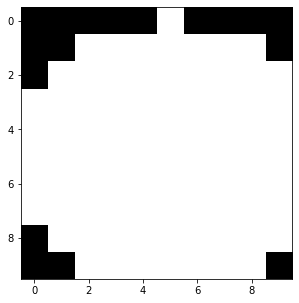

In [122]:
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(kernel,'gray')
plt.show()

In [123]:
img1_cl = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel) 

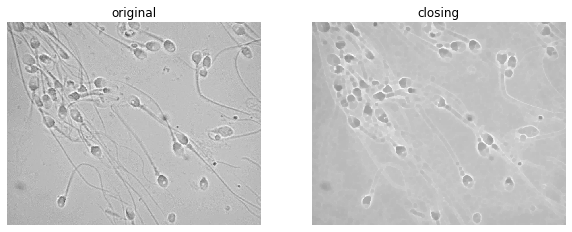

In [124]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img1,'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img1_cl,'gray',vmin = 0, vmax = 255)
plt.title('closing')
plt.axis('off')
plt.show()

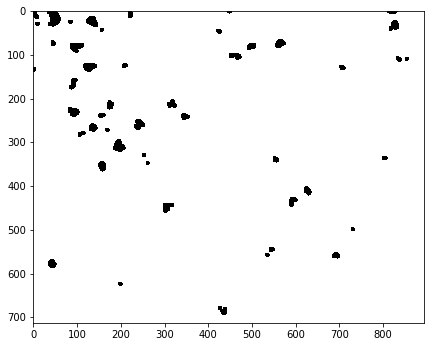

In [125]:
plt.rcParams['figure.figsize'] = [7,7]
img1_th = np.where(img1_cl > 168, 255, 0)
plt.imshow(img1_th,'gray')
plt.show()
# plt.axis('off')

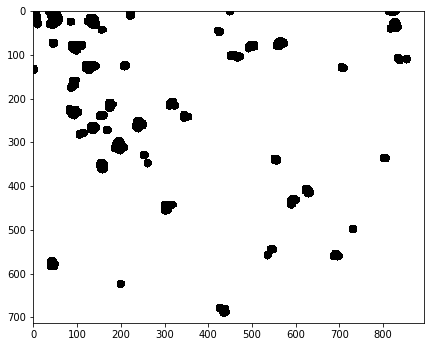

In [126]:
img1_th = img1_th.astype(np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
img1_er = cv2.erode(img1_th,kernel) 
plt.imshow(img1_er,'gray')
plt.show()

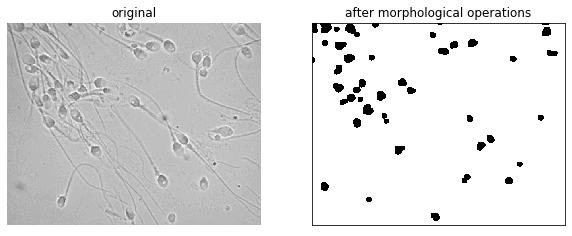

In [127]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img1,'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img1_er,'gray',vmin = 0, vmax = 255)
plt.title('after morphological operations')
plt.xticks([])
plt.yticks([])
plt.show()

In [128]:
output = cv2.connectedComponentsWithStats(255-img1_er, 8, cv2.CV_32S)

In [129]:
coors = output[3][1:,:]

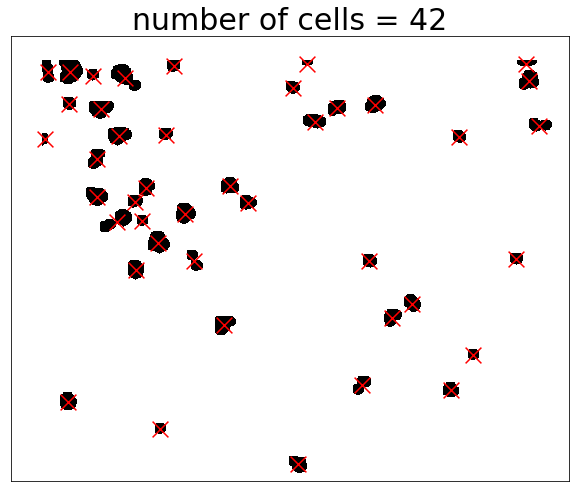

In [136]:
plt.imshow(img1_er,'gray')
for i in range(output[0]-1):
    plt.scatter(coors[i][0], coors[i][1], marker="x", color="red", s=250)
plt.title('number of cells = {}'.format(output[0]-1),size = 30)
plt.xticks([])
plt.yticks([])
plt.show()

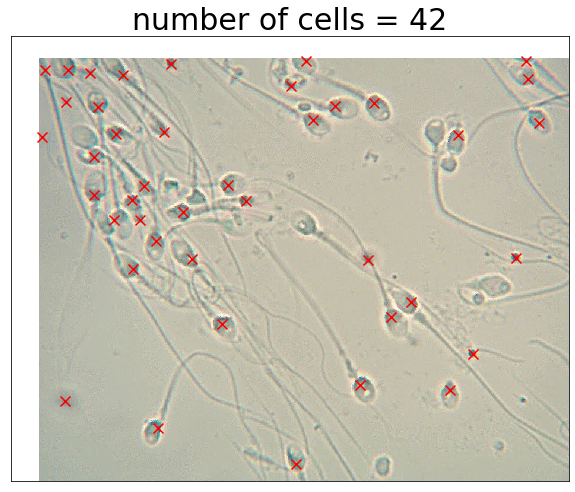

In [138]:
rgb1 = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)
plt.imshow(rgb1,'gray')
for i in range(output[0]-1):
    plt.scatter(coors[i][0], coors[i][1], marker="x", color="red", s=100)
plt.title('number of cells = {}'.format(output[0]-1),size = 30)
plt.xticks([])
plt.yticks([])
plt.show()

# b

In [539]:
images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
img2 = images[0]
ch2 = img_chnnls(img2)

In [540]:
for i in range(len(ch2)):
    ch2[i] = 255-ch2[i]

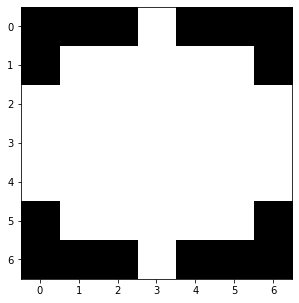

In [547]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(kernel1,'gray')
plt.show()

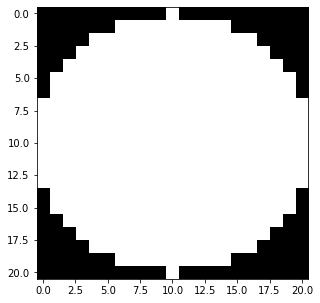

In [542]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
plt.imshow(kernel2,'gray')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

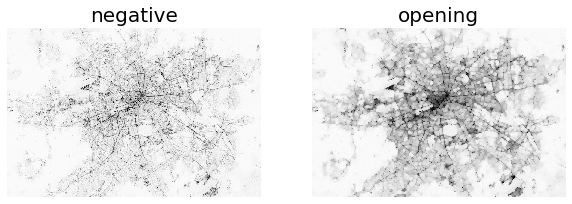

In [689]:
ch2_di = cv2.morphologyEx(ch2[0],  cv2.MORPH_OPEN,kernel1)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(ch2[0],'gray',vmin = 0, vmax = 255)
plt.title('negative',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ch2_di,'gray',vmin = 0, vmax = 255)
plt.title('opening',size = 20)
plt.axis('off')
plt.show()

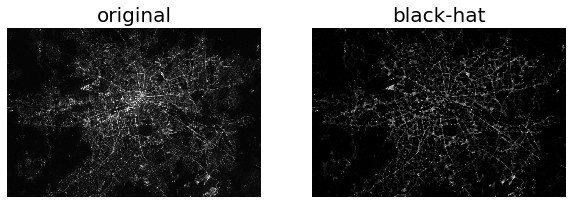

In [544]:
ch2_di2 = cv2.morphologyEx(ch2_di,  cv2.MORPH_BLACKHAT,kernel2)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(255-ch2[0],'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ch2_di2,'gray',vmin = 0, vmax = 255)
plt.title('black-hat',size = 20)
plt.axis('off')
plt.show()

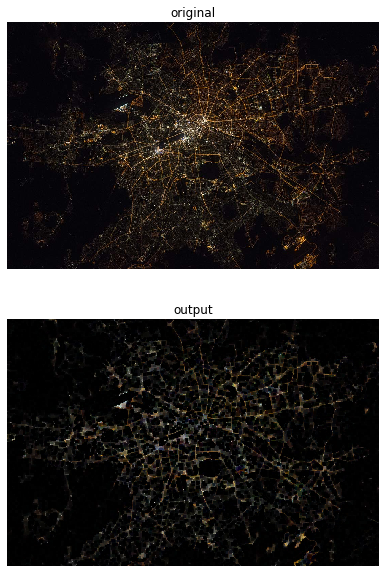

In [545]:
new_ch = []
for ch in ch2:
    new = cv2.morphologyEx(ch,  cv2.MORPH_OPEN,np.ones((7,7)))
    new = cv2.morphologyEx(new,  cv2.MORPH_BLACKHAT,kernel2)
    new_ch.append(new)
output = np.dstack(new_ch)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(2,1,1)
plt.imshow(images[0],'gray',vmin = 0, vmax = 255)
plt.title('original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(output,'gray',vmin = 0, vmax = 255)
plt.title('output')
plt.axis('off')
plt.show()

# c

In [160]:
img3 = cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(images[3], cv2.COLOR_BGR2GRAY)
gray2 = 255-gray

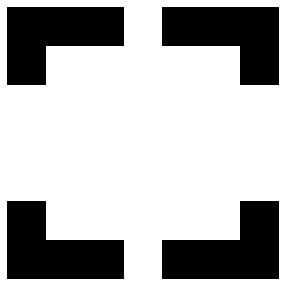

In [161]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
plt.rcParams['figure.figsize'] = [5,5]
plt.imshow(kernel1,'gray')
plt.axis('off')
plt.show()

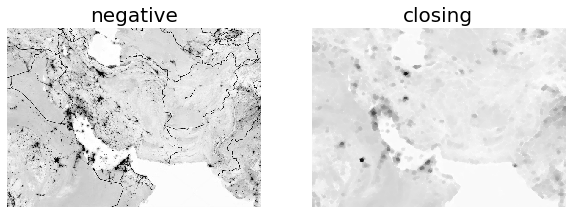

In [178]:
ch3_op = cv2.morphologyEx(gray2,  cv2.MORPH_CLOSE,kernel1)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(ch3[0],'gray',vmin = 0, vmax = 255)
plt.title('negative',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ch3_op,'gray',vmin = 0, vmax = 255)
plt.title('closing',size = 20)
plt.axis('off')
plt.show()

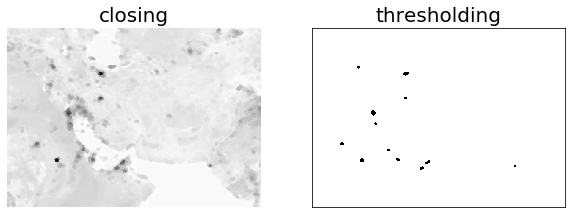

In [183]:
ch3_th = np.where(ch3_op > 130, 255, 0)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(ch3_op,'gray',vmin = 0, vmax = 255)
plt.title('closing',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ch3_th,'gray',vmin = 0, vmax = 255)
plt.title('thresholding',size = 20)
plt.xticks([])
plt.yticks([])
plt.show()

In [164]:
out = (255-ch3_th).astype(np.uint8)

In [165]:
output3 = cv2.connectedComponentsWithStats(out, 8, cv2.CV_32S)

In [166]:
coors3 = output3[3][1:,:]

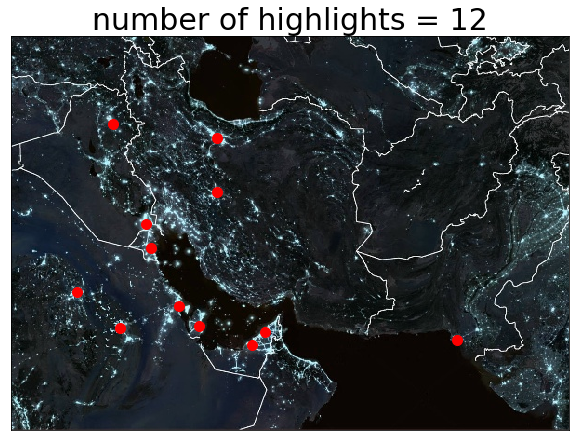

In [167]:
plt.imshow(images[3])
for i in range(output3[0]-1):
    plt.scatter(coors3[i][0], coors3[i][1], marker="o", color="red", s=100)
plt.title('number of highlights = {}'.format(output3[0]-1),size = 30)
plt.xticks([])
plt.yticks([])
plt.show()

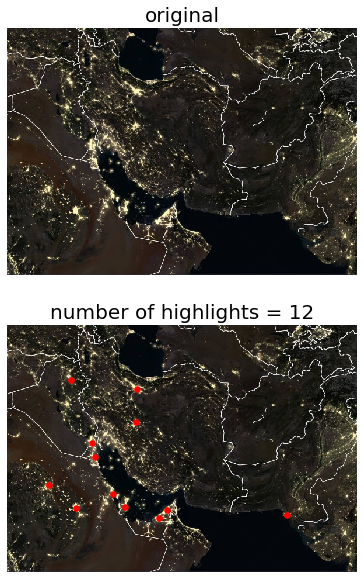

In [168]:
rgb3 = cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(2,1,1)
plt.imshow(rgb3,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(rgb3)
for i in range(output3[0]-1):
    plt.scatter(coors3[i][0], coors3[i][1], marker="o", color="red", s=30)
plt.title('number of highlights = {}'.format(output3[0]-1),size = 20)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# d (a)

In [316]:
img4 = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
img4_neg = 255-img4
ch4 = img_chnnls(img4_neg)

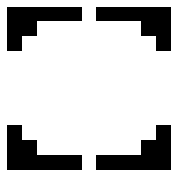

In [317]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
plt.rcParams['figure.figsize'] = [3,3]
plt.imshow(kernel1,'gray')
plt.axis('off')
plt.show()

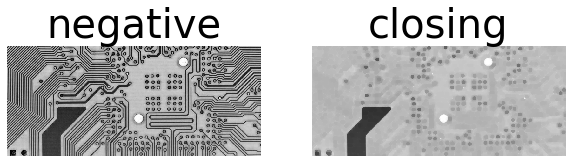

In [318]:
ch4_cl = cv2.morphologyEx(ch4[1],  cv2.MORPH_CLOSE,kernel1)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(ch4[1],'gray',vmin = 0, vmax = 255)
plt.title('negative',size = 40)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ch4_cl,'gray',vmin = 0, vmax = 255)
plt.title('closing',size = 40)
plt.axis('off')
plt.show()

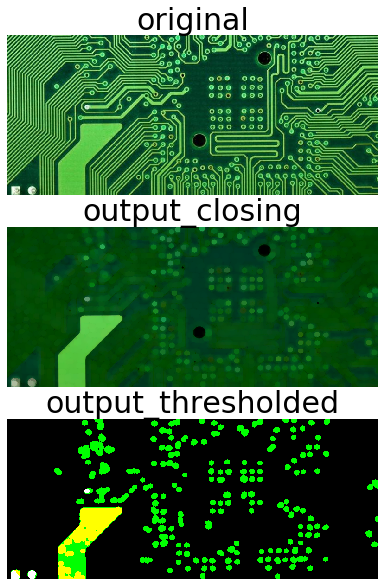

In [319]:
new_ch = []
for ch in ch4:
    new = cv2.morphologyEx(ch,  cv2.MORPH_CLOSE,kernel1)
    new_ch.append(new)
output = np.dstack(new_ch)

output_th = np.where(output > 170, 255, 0)
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(3,1,1)
plt.imshow(img4,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 30)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(255-output,'gray',vmin = 0, vmax = 255)
plt.title('output_closing',size = 30)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(255-output_th,'gray',vmin = 0, vmax = 255)
plt.title('output_thresholded',size = 30)
plt.axis('off')
plt.show()

# d (b)

In [320]:
img4 = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
img4_neg = img4
ch4 = img_chnnls(img4_neg)

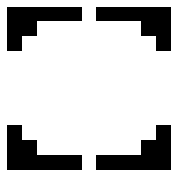

In [321]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
plt.rcParams['figure.figsize'] = [3,3]
plt.imshow(kernel1,'gray')
plt.axis('off')
plt.show()

In [322]:
kernel1 = np.rot90(np.diag(np.full(15,1))).astype(np.uint8)
kernel2 = np.diag(np.full(15,1)).astype(np.uint8)
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))
kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))


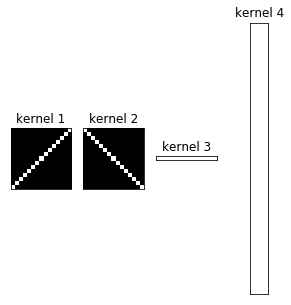

In [323]:
kernel = [kernel1,kernel2,kernel3,kernel4]
for i in range(4):
    plt.rcParams['figure.figsize'] = [5,5]
    plt.subplot(1,4,i+1)
    plt.title('kernel {}'.format(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kernel[i],'gray',vmin = 0,vmax = 1)
plt.show()

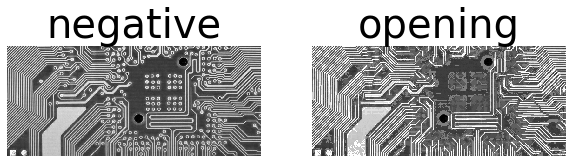

In [324]:
ch4_op1 = cv2.morphologyEx(ch4[1],  cv2.MORPH_OPEN,kernel1)
ch4_op2 = cv2.morphologyEx(ch4[1],  cv2.MORPH_OPEN,kernel2)
ch4_op3 = cv2.morphologyEx(ch4[1],  cv2.MORPH_OPEN,kernel3)
ch4_op4 = cv2.morphologyEx(ch4[1],  cv2.MORPH_OPEN,kernel4)
last1 = np.bitwise_or(ch4_op1,ch4_op2)
last2 = np.bitwise_or(ch4_op3,ch4_op4)
last3 = np.bitwise_or(last1,last2)

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(ch4[1],'gray',vmin = 0, vmax = 255)
plt.title('negative',size = 40)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(last3 ,'gray',vmin = 0, vmax = 255)
plt.title('opening',size = 40)
plt.axis('off')
plt.show()

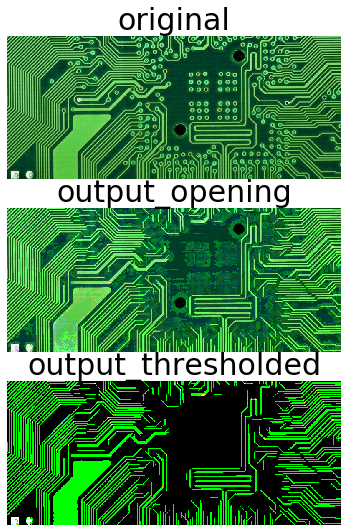

In [325]:
new_ch = []
ch_or = np.zeros((ch4[0].shape)).astype(np.uint8)
for ch in ch4:
    ch4_op1 = cv2.morphologyEx(ch,  cv2.MORPH_OPEN,kernel1)
    ch4_op2 = cv2.morphologyEx(ch,  cv2.MORPH_OPEN,kernel2)
    ch4_op3 = cv2.morphologyEx(ch,  cv2.MORPH_OPEN,kernel3)
    ch4_op4 = cv2.morphologyEx(ch,  cv2.MORPH_OPEN,kernel4)
    last1 = np.bitwise_or(ch4_op1,ch4_op2)
    last2 = np.bitwise_or(ch4_op3,ch4_op4)
    last3 = np.bitwise_or(last1,last2)
        
    new_ch.append(last3)
output = np.dstack(new_ch)

output_th = np.where(output > 170, 255, 0)
plt.rcParams['figure.figsize'] = [9,9]
plt.subplot(3,1,1)
plt.imshow(img4,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 30)
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(output,'gray',vmin = 0, vmax = 255)
plt.title('output_opening',size = 30)
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(output_th,'gray',vmin = 0, vmax = 255)
plt.title('output_thresholded',size = 30)
plt.axis('off')
plt.show()